In [11]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else 
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

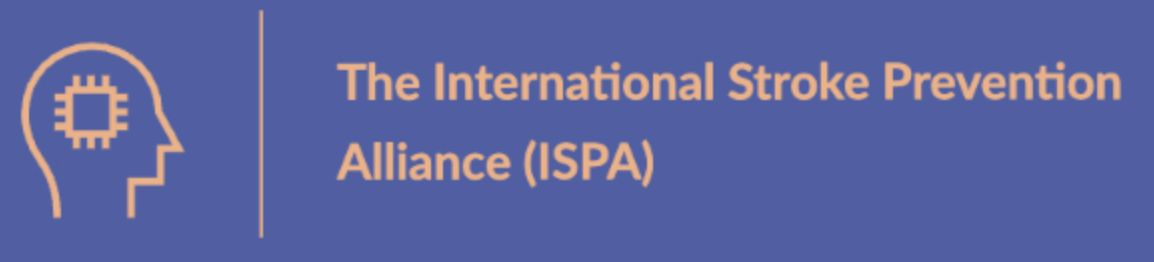

## **Problem Statement**
### **By leveraging a dataset containing presence of a stroke and several other key health variables, the International Stroke Prevention Alliance (ISPA) would like to analyze and subsequently publish what health or demographic metrics most impact likelihood of having a stroke in order to decrease the annual stroke occurrence rate by 5% in the next 10 years.**

## Data Source
### https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## Import Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## <b> Import Dataset</b>

In [13]:
stroke_data = pd.read_csv('stroke_prediction_dataset.csv')

## <b> Identify Columns </b>

In [14]:
# 12 columns in the dataset; including 3 continuous variables and 8 categorical variables
# 'ID' column is a unique identifier for each record
# Dependent variable of interest is 'stroke' 

stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
# Column 'ID' not correlated with any other columns

stroke_data.drop('id', axis = 1, inplace = True)

## <b> Describe the Data </b>

In [16]:
# Initial look at the descriptive statistics for each column

stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## <b> Data Cleansing </b>

In [17]:
# Null values? Looking for null values in the data revealed 201 records in the 'bmi' column that contained the value'N/A'

stroke_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
# Replacing the null values with the median 'bmi' value through the process of imputation
# Another possible solution would be to drop the null values all together as they amount to < 5% of total values

stroke_data['bmi'] = stroke_data['bmi'].fillna(round(stroke_data['bmi'].median(), 2))

In [19]:
stroke_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [20]:
# Abnormal values? The 'gender' column had 1 record containing a value of 'Other'

stroke_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [21]:
# Removing the 1 record containing an abnormal value with filtering

stroke_data = stroke_data[(stroke_data['gender'] == 'Male') | (stroke_data['gender'] == 'Female')]
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [22]:
# The column 'age' had a number of values < 2 containing fractions instead of whole numbers
# Additionally, no records with an age of < 2 contained an individual who had a stroke

stroke_data['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [23]:
# Filtering for values > 2 in the 'age' column

stroke_data = stroke_data[stroke_data['age'] >= 2]
stroke_data['age'].describe()

count    4989.000000
mean       44.242734
std        21.908752
min         2.000000
25%        27.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [24]:
# Creating a function to analyze numeric columns to address outliers that may skew the data
# Continuous variables and contain possible outliers include 'age', 'avg_glucose_level', and 'bmi'
# Define the remove_outliers function

def remove_outliers(stroke_data, column):
    
    Q1 = stroke_data[column].quantile(0.25)
    Q3 = stroke_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return stroke_data[(stroke_data[column] >= lower_limit) & (stroke_data[column] <= upper_limit)]

# Remove outliers for 'age' column

stroke_data = remove_outliers(stroke_data, 'age')

# Remove outliers for 'avg_glucose_level' column

stroke_data = remove_outliers(stroke_data, 'avg_glucose_level')

# Remove outliers for 'bmi' column

stroke_data = remove_outliers(stroke_data, 'bmi')

# Age column was unaffected but several extreme values in the 'avg_glucose_level' and 'bmi' columns were removed

In [25]:
# Final dataset check = 4264 viable records remain to include in our data analysis

stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000
mean,41.997889,0.076454,0.040338,91.376241,27.990783,0.038227
std,21.870736,0.265754,0.196773,22.495192,6.409957,0.191766
min,2.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,24.000000,0.000000,0.000000,75.090000,23.500000,0.000000
50%,43.000000,0.000000,0.000000,87.990000,27.800000,0.000000
75%,59.000000,0.000000,0.000000,103.737500,32.000000,0.000000
max,82.000000,1.000000,1.000000,168.680000,45.500000,1.000000


## **Issues to Analyze**

- ### Identify which <span style="color:green"> modifiable risk factors </span> are most predictive of a stroke in order to advocate for resource allocation to prevention strategies and funding best practice treatment options.

    - ### Modifiable risk factors refer to aspects of an individual's lifestyle, behavior, or environment that can be altered or controlled to reduce the risk of developing certain diseases or conditions. Making positive changes in these areas can significantly improve health outcomes.

    - ### <span style="color:green"> Modifiable risk factors = ever_married, work_type, residence_type, avg_glucose_level, bmi, & smoking_status </span>

- ### Identify which <span style="color:blue"> non-modifiable risk factors </span> are most predictive of a stroke in order to endorse resource allocation to target at-risk populations (i.e. young males or older females) for prevention strategies and funding best practice treatment options.

    - ### Non-modifiable risk factors are aspects of an individual's life or characteristics that cannot be changed or controlled. These factors are typically inherent and predetermined by genetics, age, gender, ethnicity, and family history.

    - ### <span style="color:blue"> Non-modifiable risk factors  = gender & age </span>

- ### Some factors traditionally considered modifiable can also be influenced to some extent by genetics, making them partially non-modifiable or having a genetic predisposition.

    - ### <span style="color:red"> Genetic & lifestyle factors = hypertension & heart_disease </span>

## **Analyzing the Data**

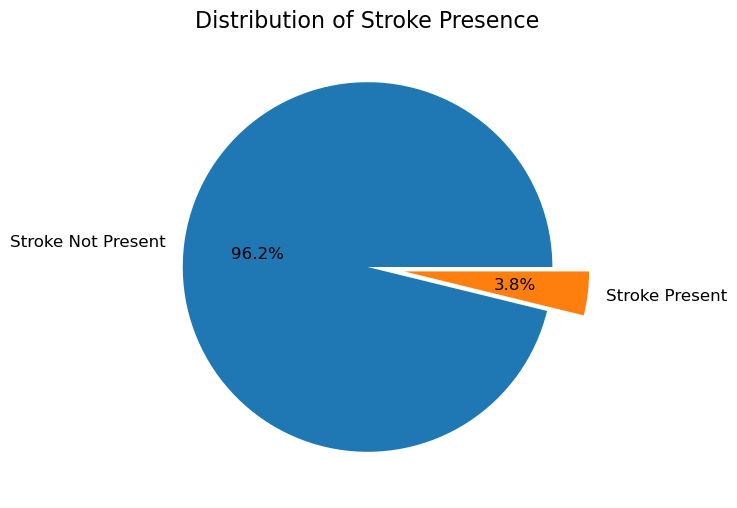

In [26]:
# Pie chart of the dependent variable 'stroke' distribution
# autopct parameter is used to format the automatic percent labels that are displayed on the chart


stroke_distribution = stroke_data['stroke'].value_counts()

plt.figure(figsize = (8, 6))
plt.pie(stroke_distribution, explode = (0, 0.2), labels = ['Stroke Not Present', 'Stroke Present'], autopct = '%1.1f%%', textprops = {'fontsize': 12})
plt.title('Distribution of Stroke Presence', fontsize = 16)
plt.savefig('Distribution of Stroke Presence.jpg')
plt.show()

## <u> Exploratory Data Analysis (EDA) Insight </u>

### 3.8% of the general dataset have had a stroke.

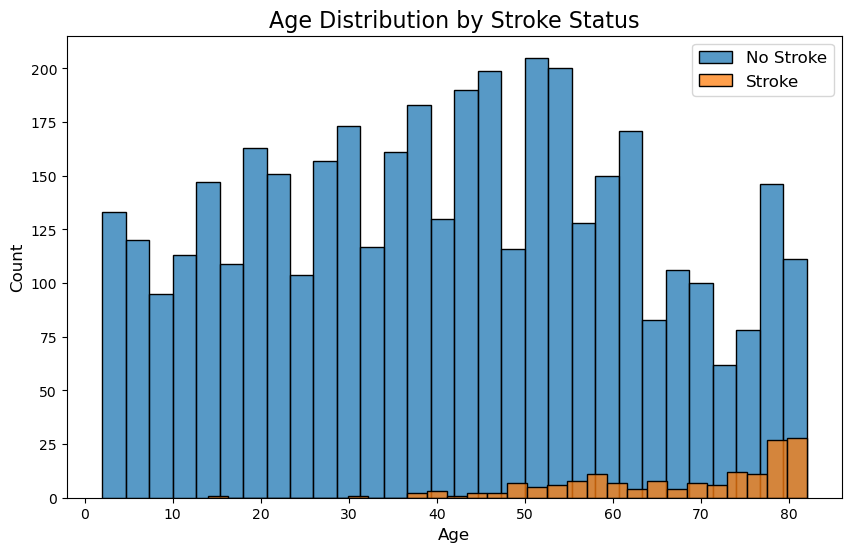

In [27]:
# Plotting a histogram of the 'age' continuous variable
# Created two subsets of data based on the 'stroke' variable

age_with_stroke = stroke_data[stroke_data['stroke'] == 1]
age_no_stroke = stroke_data[stroke_data['stroke'] == 0]

plt.figure(figsize = (10, 6))
sns.histplot(data = age_no_stroke['age'], bins = 30, label = 'No Stroke')
sns.histplot(data = age_with_stroke['age'], bins = 30, label = 'Stroke')

plt.title('Age Distribution by Stroke Status', fontsize = 16)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.legend(fontsize = 12)
plt.savefig('Age Distribution by Stroke Status.jpg')
plt.show()

# Mean of 42, median of 43 from our previous descriptive statistics
# Clear relationship exists between age and presence of stroke

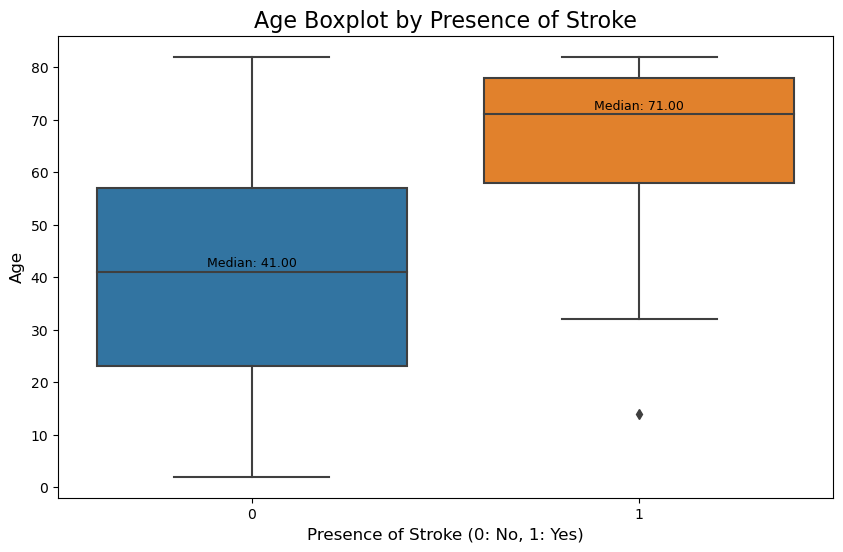

In [28]:
# Boxplot of 'age' versus 'stroke' once again reveals positive relationship between variables
# Median age for individuals who have had a stroke is 71 versus 41 for the non-stroke group

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data = stroke_data, x = 'stroke', y = 'age')
medians = stroke_data.groupby('stroke')['age'].median()
for xtick in ax.get_xticks():
    ax.text(xtick, medians[xtick] + 1, f'Median: {medians[xtick]:.2f}', horizontalalignment = 'center', fontsize = 9)
plt.xlabel('Presence of Stroke (0: No, 1: Yes)', fontsize = 12)
plt.ylabel('Age', fontsize = 12)
plt.title('Age Boxplot by Presence of Stroke', fontsize = 16)
plt.savefig('Age Boxplot by Presence of Stroke.jpg')
plt.show()

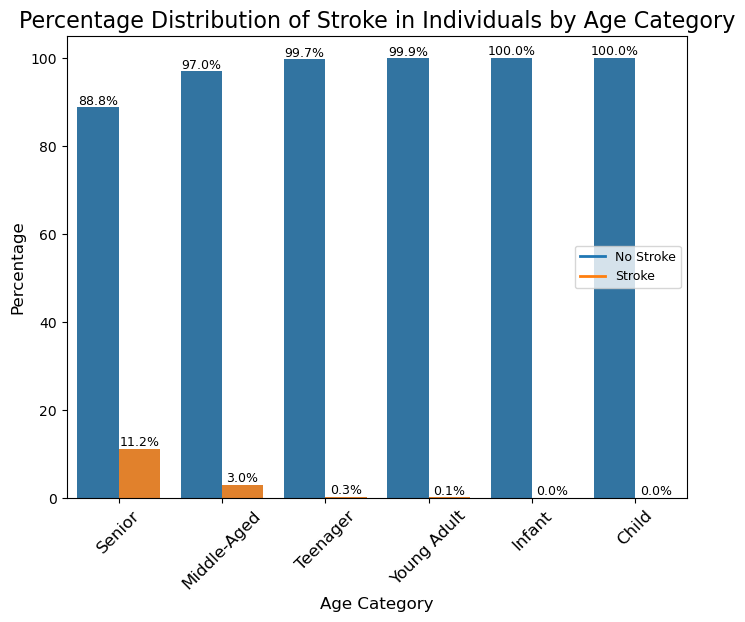

In [29]:
# Define age categories and their corresponding criteria

age_ranges = [0, 2, 12, 19, 35, 59, float('inf')]
age_categories = ['Infant', 'Child', 'Teenager', 'Young Adult', 'Middle-Aged', 'Senior']

# Create a new column 'Age_Category' based on the 'age' column in 'stroke_data'

stroke_data['age_category'] = pd.cut(stroke_data['age'], bins=age_ranges, labels=age_categories)

# Calculate the percentage of 'stroke' within each 'age_category'
percentage_data = (stroke_data.groupby(['age_category', 'stroke']).size() /
                   stroke_data.groupby('age_category')['stroke'].count()) * 100

# Reset the index to make 'age_category' a column

percentage_data = percentage_data.reset_index(name = 'Percentage')

# Calculate the maximum percentage of stroke for each category to enable sorting by descending percentage
desc_percentage_data = percentage_data.groupby('age_category')['Percentage'].max().reset_index()
desc_percent = desc_percentage_data.sort_values(by = 'Percentage', ascending = True)['age_category']

# Create a percentage stacked bar chart with sorted categories
plt.figure(figsize = (8, 6))
ax = sns.barplot(data=percentage_data, x = 'age_category', y = 'Percentage', hue = 'stroke', order = desc_percent)
plt.title('Percentage Distribution of Stroke in Individuals by Age Category', fontsize=16)
plt.xlabel('Age Category', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks(rotation = 45, fontsize = 12)

# Add percentage labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height), ha = 'center', va = 'bottom', fontsize = 9)

# Customize the legend labels and set manual colors

labels = ['No Stroke', 'Stroke']
legend_handles = [plt.Line2D([0], [0], color = sns.color_palette()[i], lw = 2) for i in range(2)]
ax.legend(legend_handles, labels, fontsize = 9, loc = 'right')

plt.savefig('Percentage Distribution of Stroke in Individuals by Age Category.jpg')
plt.show()

# Amongst age categories, seniors (11.2%) and middle-aged (3.0%) individuals have significantly higher rate of stroke occurrence 

## <u> Exploratory Data Analysis (EDA) Insight </u>

### Age demonstrated a strong relationship with stroke occurrence, with the median age of those that have had a stroke being 71 (versus 41 for the rest of the population) and grouping age categorically illustrated that 11.2% of seniors have had a stroke.

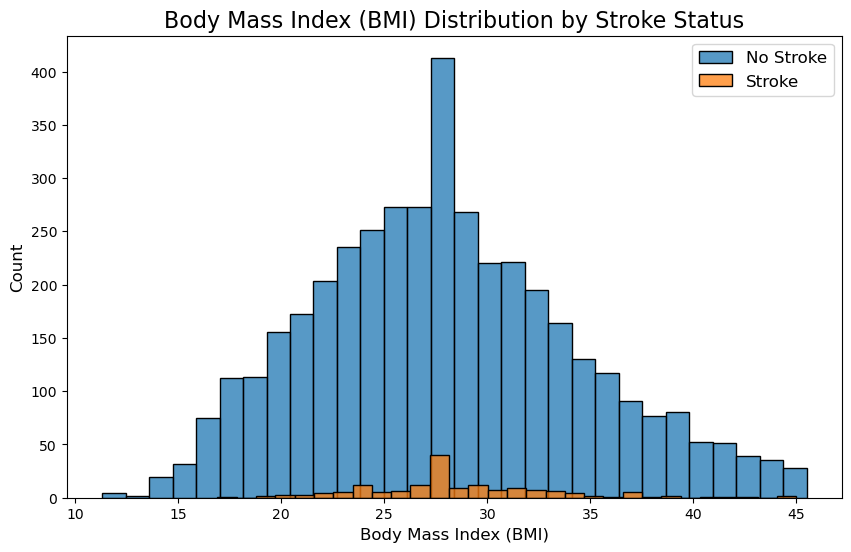

In [30]:
# Plotting a histogram of the 'bmi' continuous variable

# Created two subsets of data based on the 'stroke' variable

bmi_with_stroke = stroke_data[stroke_data['stroke'] == 1]
bmi_no_stroke = stroke_data[stroke_data['stroke'] == 0]

plt.figure(figsize = (10, 6))
sns.histplot(data = bmi_no_stroke['bmi'], bins = 30, label = 'No Stroke')
sns.histplot(data = bmi_with_stroke['bmi'], bins = 30, label = 'Stroke')

plt.title('Body Mass Index (BMI) Distribution by Stroke Status', fontsize = 16)
plt.xlabel('Body Mass Index (BMI)', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.legend(fontsize = 12)
plt.savefig('Body Mass Index (BMI) Distribution by Stroke Status.jpg')
plt.show()

# Initial inspection reveals a potential relationship between BMI and presence of stroke
# Mean of 29.1, median of 28.1 from our previous descriptive statistics
# Data appears normally distributed

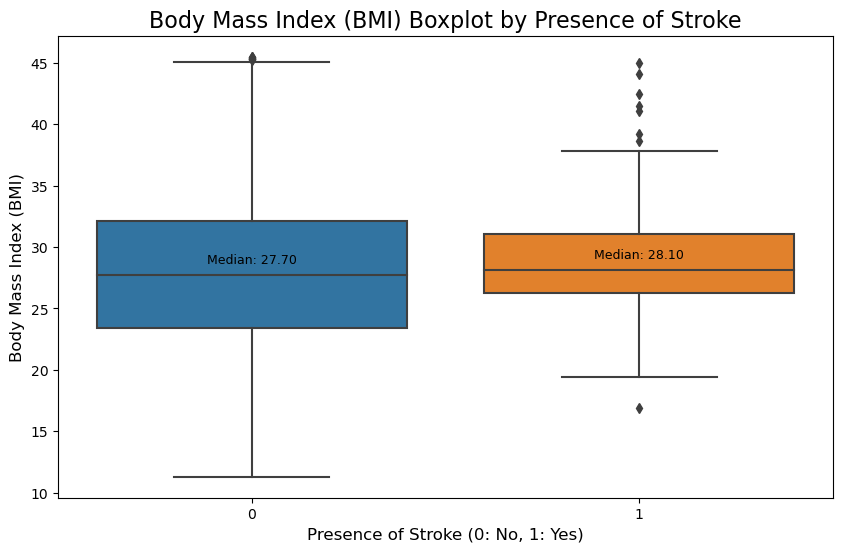

In [31]:
# Boxplot of 'bmi' versus 'stroke' reveals negligible relationship between variables
# Median bmi for individuals who have had a stroke is 28.1 versus 27.7 for the non-stroke group

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data = stroke_data, x = 'stroke', y = 'bmi')
medians = stroke_data.groupby('stroke')['bmi'].median()
for xtick in ax.get_xticks():
    ax.text(xtick, medians[xtick] + 1, f'Median: {medians[xtick]:.2f}', horizontalalignment = 'center', fontsize = 9)
plt.xlabel('Presence of Stroke (0: No, 1: Yes)', fontsize = 12)
plt.ylabel('Body Mass Index (BMI)', fontsize = 12)
plt.title('Body Mass Index (BMI) Boxplot by Presence of Stroke', fontsize = 16)
plt.savefig('Body Mass Index (BMI) Boxplot by Presence of Stroke.jpg')
plt.show()

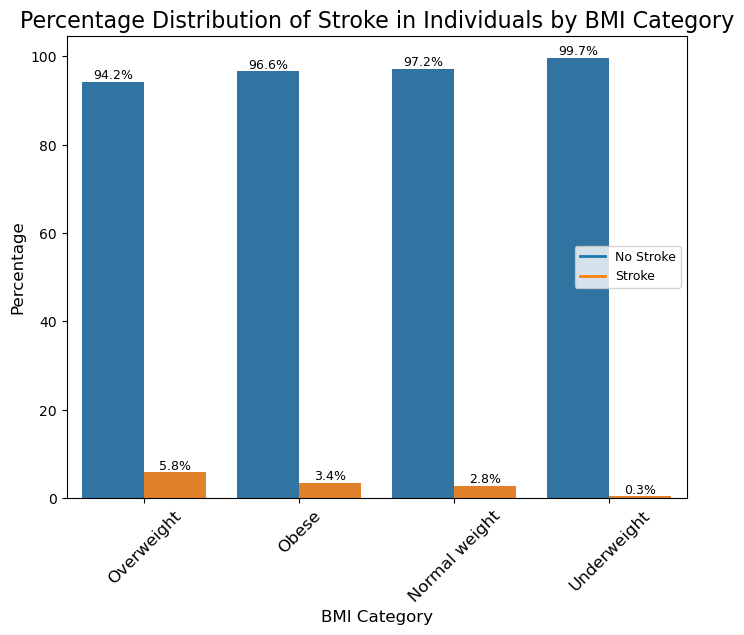

In [32]:
# Define the BMI categories and their corresponding ranges

bmi_categories = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
bmi_ranges = [0, 18.5, 24.9, 29.9, float('inf')]

# Create a new column in your DataFrame to store the BMI categories
# pd.cut is a function used to categorize numerical data into bins or categories

stroke_data['bmi_category'] = pd.cut(stroke_data['bmi'], bins = bmi_ranges, labels = bmi_categories)

# Calculate the percentage of 'stroke' within each 'bmi_category'

percentage_data = (stroke_data.groupby(['bmi_category', 'stroke']).size() /
                   stroke_data.groupby('bmi_category')['stroke'].count()) * 100

# Reset the index to make 'bmi_category' a column

percentage_data = percentage_data.reset_index(name='Percentage')

# Calculate the maximum percentage of stroke for each category to enable sorting by descending percentage

desc_percentage_data = percentage_data.groupby('bmi_category')['Percentage'].max().reset_index()
desc_percent = desc_percentage_data.sort_values(by = 'Percentage', ascending = True)['bmi_category']

# Create a percentage stacked bar chart with sorted categories

plt.figure(figsize = (8, 6))
ax = sns.barplot(data = percentage_data, x = 'bmi_category', y = 'Percentage', hue = 'stroke', order = desc_percent)
plt.title('Percentage Distribution of Stroke in Individuals by BMI Category', fontsize = 16)
plt.xlabel('BMI Category', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks(rotation = 45, fontsize = 12)

# Add percentage labels to each bar

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height), ha = 'center', va = 'bottom', fontsize = 9)

# Customize the legend labels and set manual colors

labels = ['No Stroke', 'Stroke']
legend_handles = [plt.Line2D([0], [0], color = sns.color_palette()[i], lw = 2) for i in range(2)]
ax.legend(legend_handles, labels, fontsize = 9, loc = 'right')

plt.savefig('Percentage Distribution of Stroke in Individuals by BMI Category.jpg')
plt.show()

# Greater percentage of ppl in the overweight (5.8%) and obese (3.4%) categories have suffered a stroke

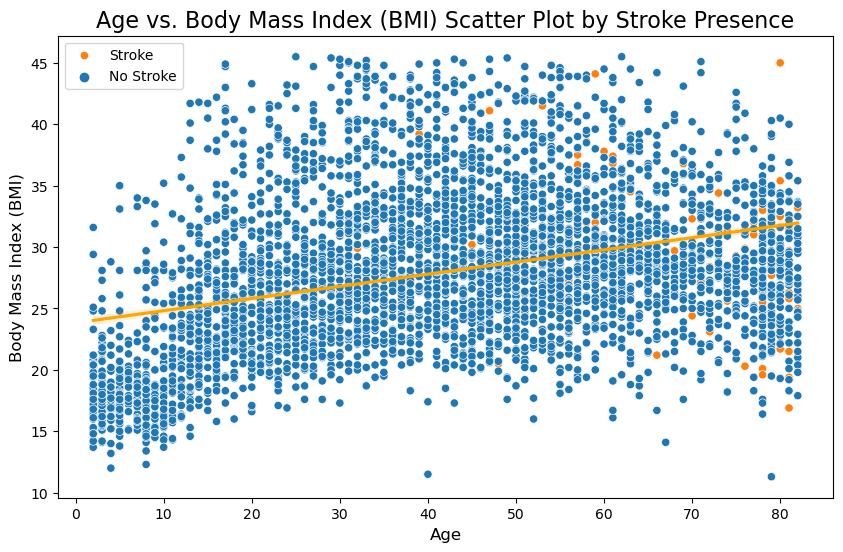

In [33]:
# Scatterplot between continuous variables 'age' and 'bmi' with hue based on 'stroke'
# Visualizes later established positive correlation of .34 between 'age' and 'bmi'

plt.figure(figsize = (10, 6))
sns.scatterplot(data = stroke_data, x = 'age', y = 'bmi', hue = 'stroke')
sns.regplot(data = stroke_data, x = 'age', y = 'bmi', scatter = False, color = 'orange')
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Body Mass Index (BMI)', fontsize = 12)
plt.legend(labels = ['Stroke', 'No Stroke'], fontsize = 10)
plt.title('Age vs. Body Mass Index (BMI) Scatter Plot by Stroke Presence', fontsize = 16)
plt.savefig('Age vs. Body Mass Index (BMI) Scatter Plot with Trendline.jpg')
plt.show()

# Age influences likelihood of stroke more so than bmi

## <u> Exploratory Data Analysis (EDA) Insight </u>

### Body Mass Index (BMI) did not show a clear relationship with stroke occurrence when data was plotted on a histogram as well as a boxplot. When BMI was grouped categorically, a pattern emerged - 5.8% of overweight people had a stroke. The second highest rate of stroke was found in obese people (3.4%) and outpaced the rest of the groups. 

### BMI and age were positively correlated with one another (.34)

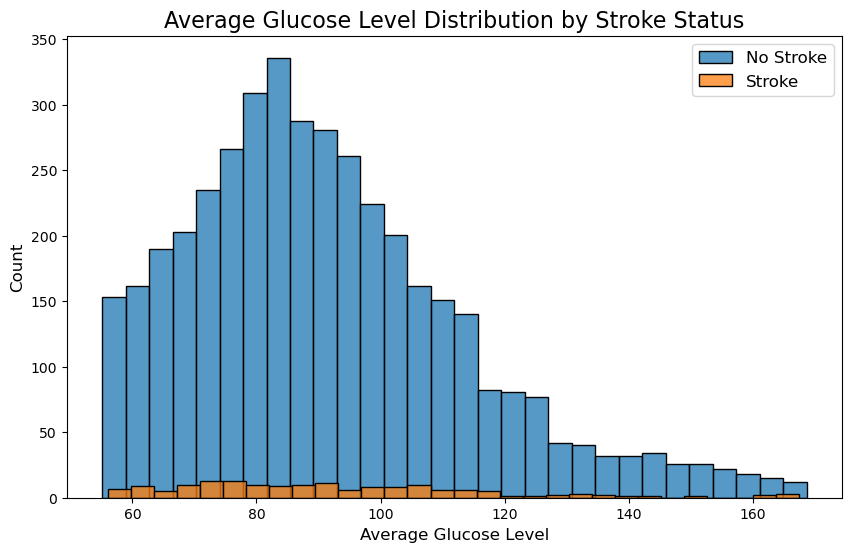

In [34]:
# Plotting a histogram of the 'avg_glucose_level' continuous variable
# Created two subsets of data based on the 'stroke' variable

glucose_with_stroke = stroke_data[stroke_data['stroke'] == 1]
glucose_no_stroke = stroke_data[stroke_data['stroke'] == 0]

plt.figure(figsize = (10, 6))
sns.histplot(data = glucose_no_stroke['avg_glucose_level'], bins = 30, label = 'No Stroke')
sns.histplot(data = glucose_with_stroke['avg_glucose_level'], bins = 30, label = 'Stroke')

plt.title('Average Glucose Level Distribution by Stroke Status', fontsize = 16)
plt.xlabel('Average Glucose Level', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.legend(fontsize = 12)
plt.savefig('Average Glucose Level Distribution by Stroke Status.jpg')
plt.show()

# Mean of 106.4, median of 91.9 from our previous descriptive statistics
# Initial inspection reveals no clear correlation between average glucose level and presence of stroke
# Data appears somewhat skewed to the right, despite removal of outliers

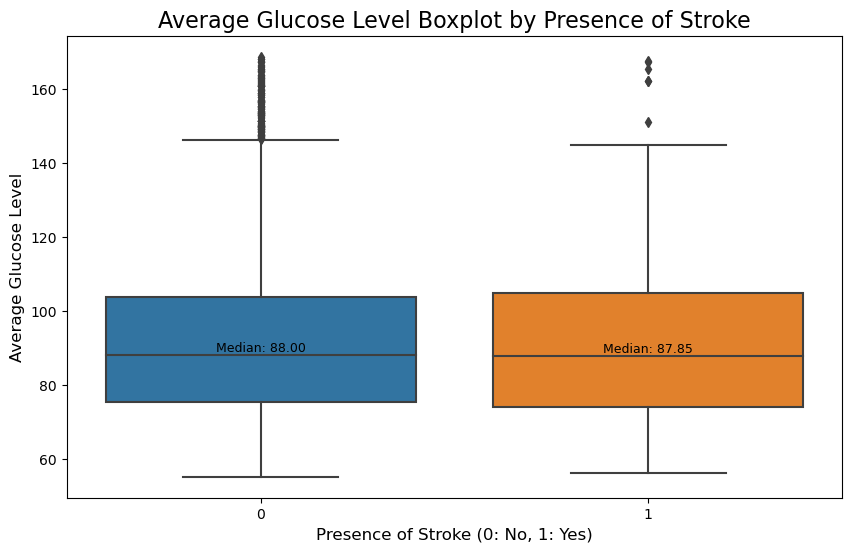

In [35]:
# Boxplot of 'avg_glucose_level' versus 'stroke' negligible relationship between variables
# Median avg_glucose_level for individuals who have had a stroke is 86.6 versus 87.1 for the non-stroke group

plt.figure(figsize = (10, 6))
ax = sns.boxplot(data = stroke_data, x = 'stroke', y = 'avg_glucose_level')

medians = stroke_data.groupby('stroke')['avg_glucose_level'].median()

for xtick in ax.get_xticks():
    ax.text(xtick, medians[xtick] + 1, f'Median: {medians[xtick]:.2f}', horizontalalignment = 'center', fontsize = 9)

plt.xlabel('Presence of Stroke (0: No, 1: Yes)', fontsize = 12)
plt.ylabel('Average Glucose Level', fontsize = 12)
plt.title('Average Glucose Level Boxplot by Presence of Stroke', fontsize = 16)
plt.savefig('Average Glucose Level Boxplot by Presence of Stroke.jpg')
plt.show()

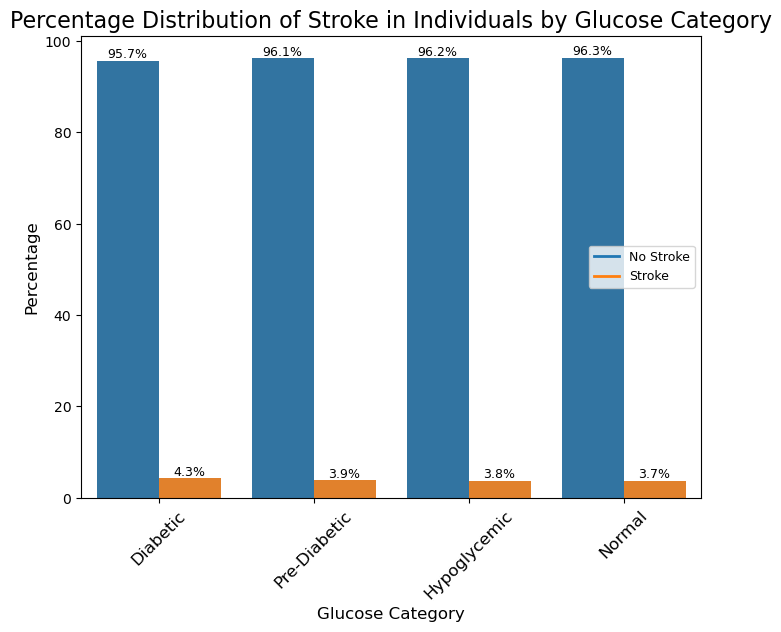

In [36]:
# Define the average glucose level categories and their corresponding ranges

glucose_categories = ['Hypoglycemic', 'Normal', 'Pre-Diabetic', 'Diabetic']
glucose_ranges = [0, 70, 99, 125, float('inf')]

# Create a new column in your DataFrame to store the glucose level categories

stroke_data['glucose_category'] = pd.cut(stroke_data['avg_glucose_level'], bins = glucose_ranges, labels = glucose_categories)

# Calculate the percentage of 'stroke' within each 'glucose_category'

percentage_data = (stroke_data.groupby(['glucose_category', 'stroke']).size() /
                   stroke_data.groupby('glucose_category')['stroke'].count()) * 100

# Reset the index to make 'glucose_category' a column

percentage_data = percentage_data.reset_index(name = 'Percentage')

# Calculate the maximum percentage of stroke for each category to enable sorting by descending percentage

desc_percentage_data = percentage_data.groupby('glucose_category')['Percentage'].max().reset_index()
desc_percent = desc_percentage_data.sort_values(by = 'Percentage', ascending = True)['glucose_category']

# Create a percentage stacked bar chart with sorted categories

plt.figure(figsize = (8, 6))
ax = sns.barplot(data=percentage_data, x = 'glucose_category', y = 'Percentage', hue = 'stroke', order = desc_percent)
plt.title('Percentage Distribution of Stroke in Individuals by Glucose Category', fontsize = 16)
plt.xlabel('Glucose Category', fontsize  =12)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks(rotation = 45, fontsize = 12)

# Add percentage labels to each bar

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height), ha = 'center', va = 'bottom', fontsize = 9)

# Customize the legend labels and set manual colors
labels = ['No Stroke', 'Stroke']
legend_handles = [plt.Line2D([0], [0], color = sns.color_palette()[i], lw = 2) for i in range(2)]
ax.legend(legend_handles, labels, fontsize = 9, loc = 'right')

plt.savefig('Percentage Distribution of Stroke in Individuals by Glucose Category.jpg')
plt.show()

# Greater percentage of ppl in the diabetic (4.3%) category have suffered a stroke

## <u> Exploratory Data Analysis (EDA) Insight </u>

### Average glucose level did not show a clear relationship with stroke occurrence when data was plotted on a histogram as well as a boxplot. Drilling down a bit deeper, when average glucose level was grouped categorically, we can clearly see that diabetics are at a higher risk (4.3%).

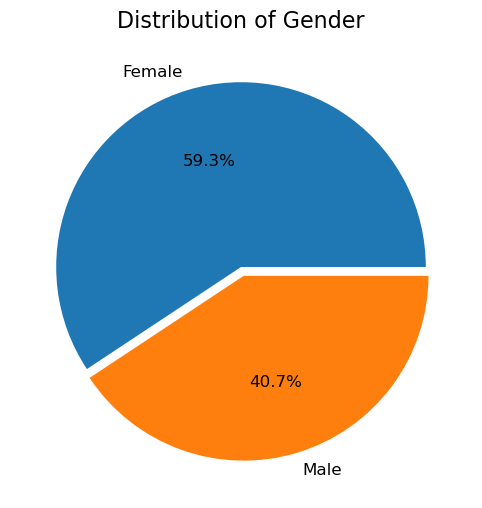

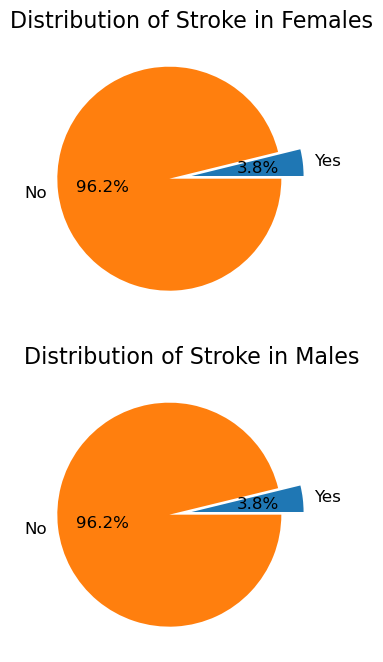

3.804
3.836


In [37]:
# Pie chart of the variable 'gender' distribution
# Around 60% of the dataset are female

gender_distribution = stroke_data['gender'].value_counts()

plt.figure(figsize = (8, 6))
plt.pie(gender_distribution, labels = ['Female', 'Male'], explode = (0, 0.05), autopct = '%1.1f%%', textprops = {'fontsize': 12})
plt.title('Distribution of Gender', fontsize = 16)
plt.savefig('Distribution of Gender.jpg')
plt.show()

# Next, we want to see how 'stroke' values are distributed amongst each gender to see if a pattern emerges

# Filter the data for females and males

female_data = stroke_data[stroke_data['gender'] == 'Female']
male_data = stroke_data[stroke_data['gender'] == 'Male']

# Calculate the number of females and males who had a stroke

female_stroke_count = (female_data['stroke'] == 1).sum()
male_stroke_count = (male_data['stroke'] == 1).sum()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (4, 8))

# Pie chart for Females
# Plotted the count of females with and without a stroke as a %

ax1.pie([female_stroke_count, len(female_data) - female_stroke_count],
        labels = ['Yes', 'No'],
        explode = (0, 0.2), autopct = '%1.1f%%', textprops = {'fontsize': 12})
ax1.set_title('Distribution of Stroke in Females', fontsize = 16)

# Pie chart for Males
# Plotted the count of males with and without a stroke as a %

ax2.pie([male_stroke_count, len(male_data) - male_stroke_count],
        labels = ['Yes', 'No'],
        explode = (0, 0.2), autopct = '%1.1f%%', textprops = {'fontsize': 12})
ax2.set_title('Distribution of Stroke in Males', fontsize = 16)

plt.savefig('Distribution of Stroke Presence by Gender.jpg')
plt.show()

# Surprisingly, males and females are equal in their rate of 'stroke' occurrence
# Checking to be sure...

male_stroke_percent = round((male_data['stroke'] == 1).mean() * 100, 3)
female_stroke_percent = round((female_data['stroke'] == 1).mean() * 100, 3)

print(male_stroke_percent)
print(female_stroke_percent)

# Stroke rate in both genders is identical

## <u> Exploratory Data Analysis (EDA) Insight </u>

### Gender did not affect stroke rate - men and women suffered strokes at the same rate (3.8%).

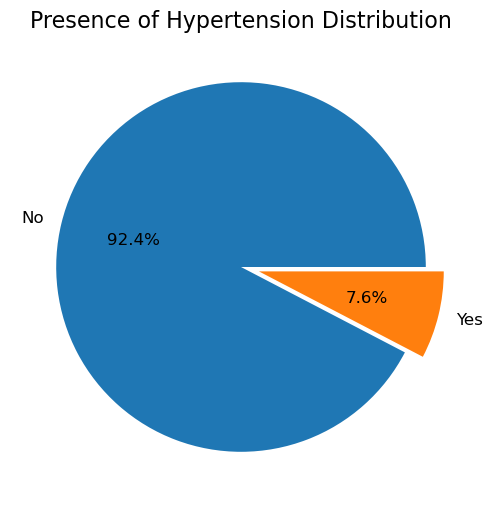

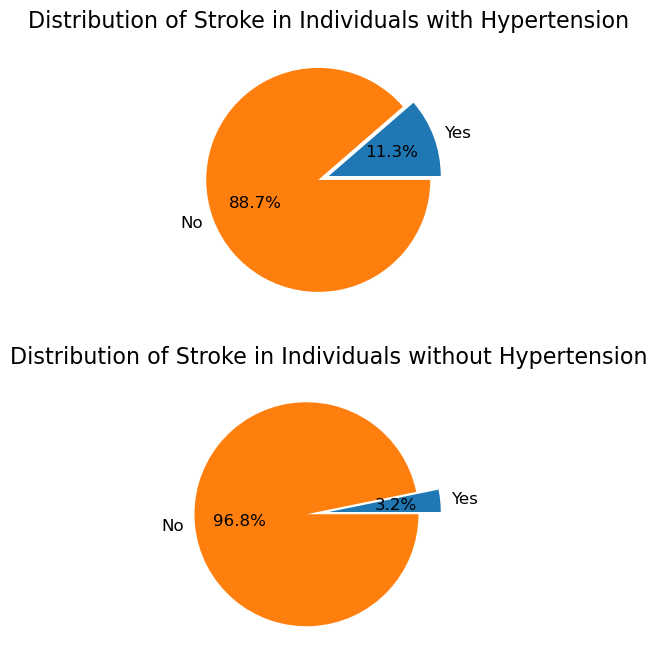

In [38]:
# Pie chart of the variable 'hypertension' distribution
# Around 7.6% of the dataset has high blood pressure

hypertension_distribution = stroke_data['hypertension'].value_counts()

plt.figure(figsize = (8, 6))
plt.pie(hypertension_distribution, explode = (0, 0.1), labels = ['No', 'Yes'], autopct='%1.1f%%', textprops = {'fontsize': 12})
plt.title('Presence of Hypertension Distribution', fontsize = 16)
plt.savefig('Distribution of Hypertension Presence.jpg')
plt.show()

# Filter the data for individuals with and without hypertension

hypertension = stroke_data[stroke_data['hypertension'] == 1]
no_hypertension = stroke_data[stroke_data['hypertension'] == 0]

# Calculate the number of individuals with and without hypertension who had a stroke
hypertension_stroke_count = (hypertension['stroke'] == 1).sum()
no_hypertension_stroke_count = (no_hypertension['stroke'] == 1).sum()

# Create a figure with two subplots stacked vertically

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (4, 8))

# Pie chart for individuals with hypertension

ax1.pie([hypertension_stroke_count, len(hypertension) - hypertension_stroke_count],
        labels = ['Yes', 'No'], explode = (0, 0.1), autopct = '%1.1f%%', textprops = {'fontsize': 12})
ax1.set_title('Distribution of Stroke in Individuals with Hypertension', fontsize = 16)

# Pie chart for individuals without hypertension

ax2.pie([no_hypertension_stroke_count, len(no_hypertension) - no_hypertension_stroke_count],
        labels = ['Yes', 'No'], explode = (0, 0.2), autopct = '%1.1f%%', textprops = {'fontsize': 12})
ax2.set_title('Distribution of Stroke in Individuals without Hypertension', fontsize = 16)

plt.savefig('Distribution of Stroke Presence by Hypertension.jpg')
plt.show()

# Unsurpringly, hypertension sufferers have a higher rate of 'stroke' occurrence than those with normal BP
# 11.3% of people who have hypertension have had a stroke, compared to 3.2% of those without hypertension

## <u> Exploratory Data Analysis (EDA) Insight </u>

### Those without hypertension had a stroke rate lower (3.2%) than the broader average while the stroke rate in those with hypertension was extremely high (11.3%).

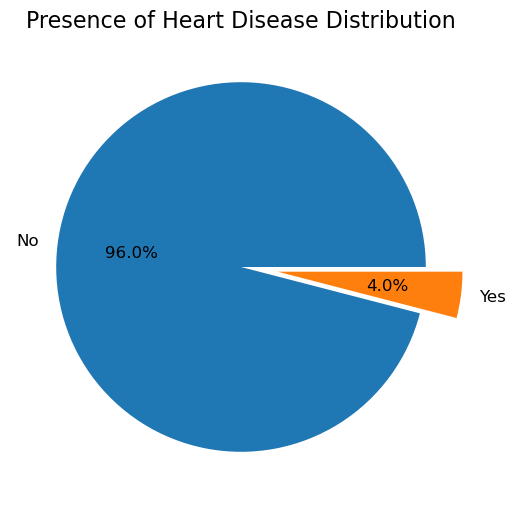

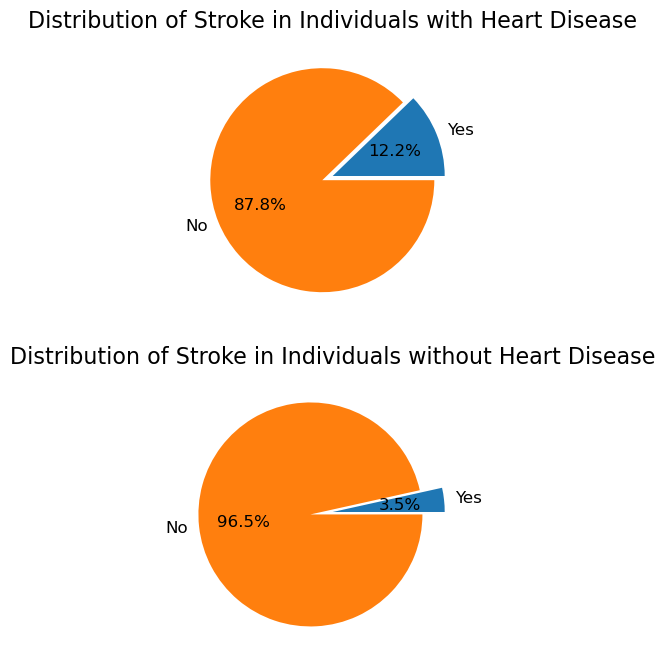

In [39]:
# Pie chart of the variable 'heart_disease' distribution
# Around 4% of the dataset has heart_disease

heart_disease_distribution = stroke_data['heart_disease'].value_counts()

plt.figure(figsize = (8, 6))
plt.pie(heart_disease_distribution, explode = (0, 0.2), labels = ['No', 'Yes'], autopct='%1.1f%%', textprops = {'fontsize': 12})
plt.title('Presence of Heart Disease Distribution', fontsize = 16)
plt.savefig('Presence of Heart Disease Distribution.jpg')
plt.show()

# Filter the data for individuals with and without heart disease

heart_disease = stroke_data[stroke_data['heart_disease'] == 1]
no_heart_disease = stroke_data[stroke_data['heart_disease'] == 0]

# Calculate the number of individuals with and without heart disease who had a stroke

heart_disease_stroke_count = (heart_disease['stroke'] == 1).sum()
no_heart_disease_stroke_count = (no_heart_disease['stroke'] == 1).sum()

# Create a figure with two subplots stacked vertically

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (4, 8))

# Pie chart for individuals with heart disease

ax1.pie([heart_disease_stroke_count, len(heart_disease) - heart_disease_stroke_count],
        labels = ['Yes', 'No'], explode = (0, 0.1), autopct = '%1.1f%%', textprops = {'fontsize': 12})
ax1.set_title('Distribution of Stroke in Individuals with Heart Disease', fontsize = 16)

# Pie chart for individuals without heart disease

ax2.pie([no_heart_disease_stroke_count, len(no_heart_disease) - no_heart_disease_stroke_count],
        labels = ['Yes', 'No'], explode = (0, 0.2), autopct = '%1.1f%%', textprops = {'fontsize': 12})
ax2.set_title('Distribution of Stroke in Individuals without Heart Disease', fontsize = 16)

plt.savefig('Distribution of Stroke in Individuals by Heart Disease.jpg')
plt.show()

# Unsurpringly, heart disease sufferers have a higher rate of 'stroke' occurrence than those without the disease
# 12.2% of people who have heart disease have had a stroke, compared to 3.5% of those without heart disease

## <u> Exploratory Data Analysis (EDA) Insight </u>

### Similarly, only 3.5% of people without heart disease had a stroke but those individuals who have heart disease had a stroke rate over three times higher (12.2%).

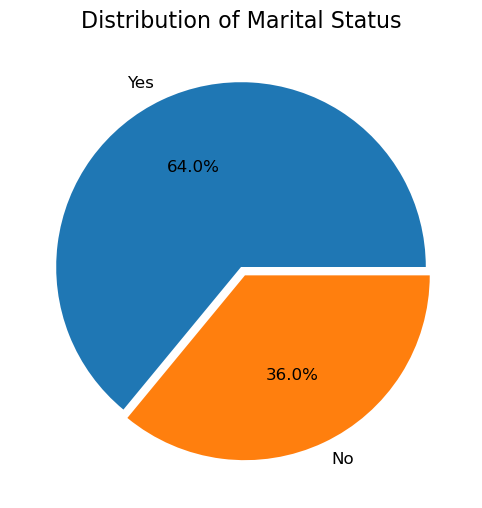

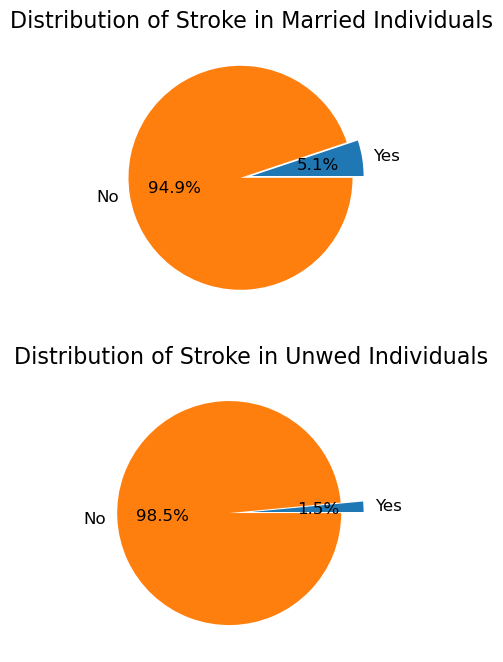

Median Ages by ever_married
No     22.6
Yes    52.9
Name: age, dtype: float64 


In [40]:
# Pie chart of the variable 'ever_married' distribution
# Around 64% of the dataset has ever been married

ever_married_distribution = stroke_data['ever_married'].value_counts()

plt.figure(figsize = (8, 6))
plt.pie(ever_married_distribution, explode = (0, 0.05), labels = ['Yes', 'No'], autopct = '%1.1f%%', textprops = {'fontsize': 12})
plt.title('Distribution of Marital Status', fontsize = 16)
plt.savefig('Distribution of Marital Status.jpg')
plt.show()

# Filter the data for individuals who are married or not

married_yes = stroke_data[stroke_data['ever_married'] == 'Yes']
married_no = stroke_data[stroke_data['ever_married'] == 'No']

# Calculate the number of individuals with 'Yes' and 'No' marital status who had a stroke

married_yes_stroke_count = (married_yes['stroke'] == 1).sum()
married_no_stroke_count = (married_no['stroke'] == 1).sum()

# Create a figure with two subplots stacked vertically

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (4, 8))

# Pie chart for individuals with 'Yes' marital status

ax1.pie([married_yes_stroke_count, len(married_yes) - married_yes_stroke_count],
        labels = ['Yes', 'No'], explode = (0, 0.1), autopct = '%1.1f%%', textprops = {'fontsize': 12})
ax1.set_title('Distribution of Stroke in Married Individuals', fontsize = 16)

# Pie chart for individuals with 'No' marital status

ax2.pie([married_no_stroke_count, len(married_no) - married_no_stroke_count],
        labels = ['Yes', 'No'], explode = (0, 0.2), autopct = '%1.1f%%', textprops = {'fontsize': 12})
ax2.set_title('Distribution of Stroke in Unwed Individuals', fontsize = 16)

plt.savefig('Distribution of Stroke in Individuals by Marital Status.jpg')
plt.show()

# 5.1% of people who have had a stroke are married, compared to 1.5% of those who are unwed
# Married people have a higher rate of 'stroke' occurrence than those who are unwed
# Likely because average age people who are married is higher (52.9 vs. 22.6) and age is correlated to 'stroke'

avg_age_by_ever_married = stroke_data.groupby('ever_married')['age'].mean().round(1)
print("\033[1mMedian Ages by", avg_age_by_ever_married, "\033[0m")

## <u> Exploratory Data Analysis (EDA) Insight </u>

### At first glance, married individuals had a higher stroke rate (5.1%) than unwed individuals (1.5%). However, this data could be heavily influenced by the fact that married people were much older - with a median age of 53 versus 23.

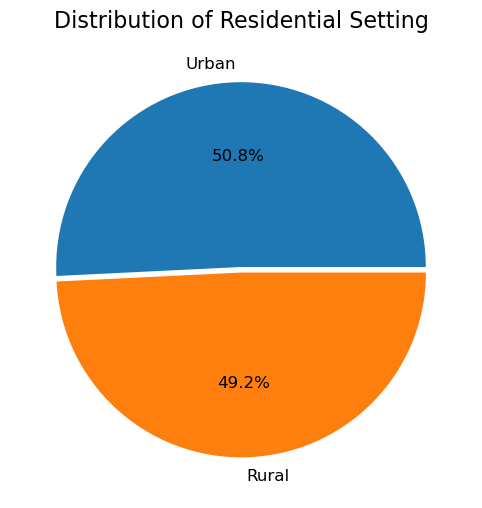

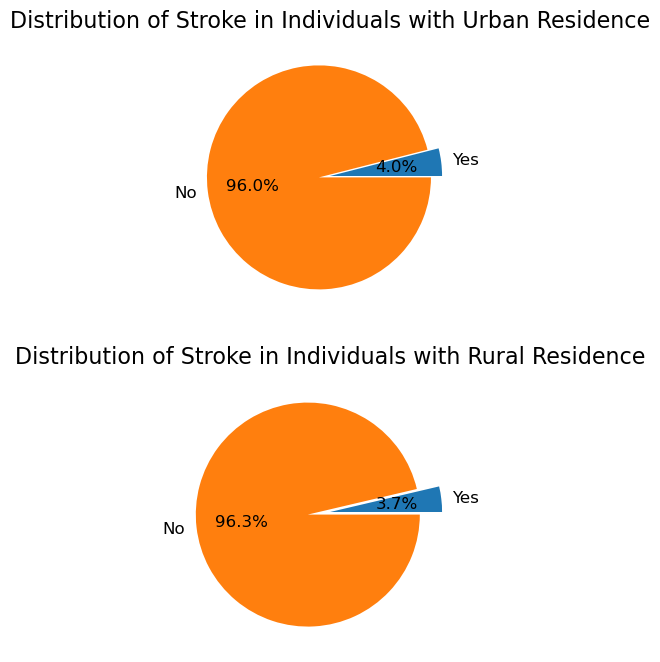

In [41]:
# Pie chart of the variable 'Residence_type' distribution
# Data is evenly split between individuals living in cities versus rural settings

residence_distribution = stroke_data['Residence_type'].value_counts()
plt.figure(figsize = (8, 6))
plt.pie(residence_distribution, explode = (0, 0.03), labels = ['Urban', 'Rural'], autopct = '%1.1f%%',  textprops = {'fontsize': 12})
plt.title('Distribution of Residential Setting', fontsize = 16)
plt.savefig('Distribution of Residential Setting.jpg')
plt.show()

# Filter the data by 'Residence_type'

urban_residence = stroke_data[stroke_data['Residence_type'] == 'Urban']
rural_residence = stroke_data[stroke_data['Residence_type'] == 'Rural']

# Calculate the number of individuals with 'Urban' and 'Rural' residence who had a stroke

urban_residence_stroke_count = (urban_residence['stroke'] == 1).sum()
rural_residence_stroke_count = (rural_residence['stroke'] == 1).sum()

# Create a figure with two subplots stacked vertically

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (4, 8))

# Pie chart for individuals with 'Urban' residence

ax1.pie([urban_residence_stroke_count, len(urban_residence) - urban_residence_stroke_count],
        labels = ['Yes', 'No'], explode = (0, 0.1), autopct = '%1.1f%%', textprops = {'fontsize': 12})
ax1.set_title('Distribution of Stroke in Individuals with Urban Residence', fontsize = 16)

# Pie chart for individuals with 'Rural' residence

ax2.pie([rural_residence_stroke_count, len(rural_residence) - rural_residence_stroke_count],
        labels = ['Yes', 'No'], explode = (0, 0.2), autopct = '%1.1f%%', textprops = {'fontsize': 12})
ax2.set_title('Distribution of Stroke in Individuals with Rural Residence', fontsize = 16)

plt.savefig('Distribution of Stroke in Individuals by Residential Status.jpg')
plt.show()

# Slightly higher rate of stroke amongst urban dwellers versus rural dwellers

## <u> Exploratory Data Analysis (EDA) Insight </u>

### Residential setting slightly affected stroke rate, with urban dwellers (4.0%) at a higher risk versus those living in rural settings (3.7%).

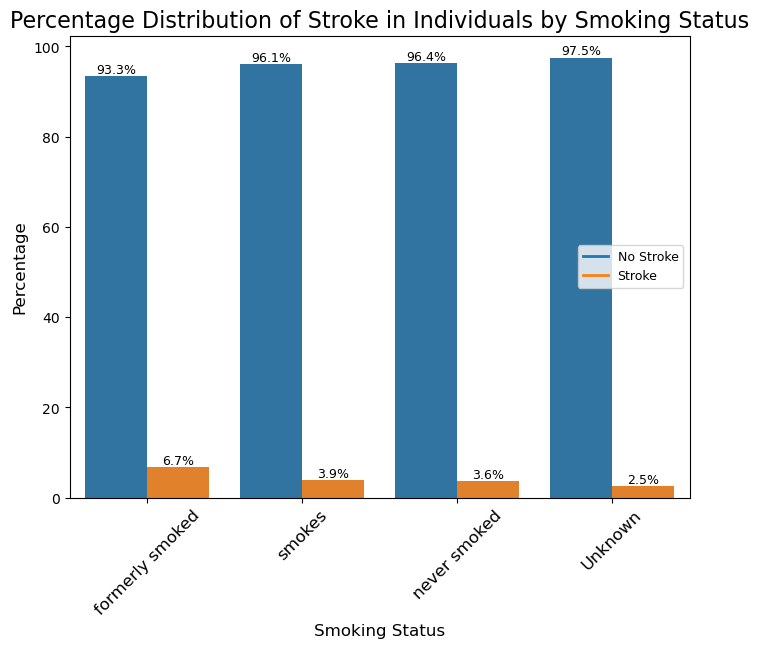

In [42]:
# Calculate the percentage of 'stroke' within each 'smoking_status' category

percentage_data = (stroke_data.groupby(['smoking_status', 'stroke']).size() / 
                   stroke_data.groupby('smoking_status')['stroke'].count()) * 100

# Reset the index to make 'smoking_status' a column

percentage_data = percentage_data.reset_index(name = 'Percentage')

# Calculate the maximum percentage of stroke for each category to enable sorting by descending percentage
desc_percentage_data = percentage_data.groupby('smoking_status')['Percentage'].max().reset_index()
desc_percent = desc_percentage_data.sort_values(by='Percentage', ascending = True)['smoking_status']

# Create a percentage stacked bar chart

plt.figure(figsize = (8, 6))
ax = sns.barplot(data=percentage_data, x = 'smoking_status', y = 'Percentage', hue = 'stroke', order = desc_percent)
plt.title('Percentage Distribution of Stroke in Individuals by Smoking Status', fontsize = 16)
plt.xlabel('Smoking Status', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks(rotation = 45, fontsize = 12)

# Add percentage labels to each bar

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height), ha = 'center', va = 'bottom', fontsize = 9)
    
# Customize the legend labels and set manual colors
    
labels = ['No Stroke', 'Stroke']
legend_handles = [plt.Line2D([0], [0], color = sns.color_palette()[i], lw = 2) for i in range(2)]
ax.legend(legend_handles, labels, fontsize = 9, loc = 'right')

plt.savefig('Percentage Distribution of Stroke in Individuals by Smoking Status.jpg')
plt.show()

# Current or former smokers have higher rates (6.7% and 3.9%) of stroke occurrence than those who never smoked

## <u> Exploratory Data Analysis (EDA) Insight </u>

### Former smokers (6.7%) were at a significantly higher risk of stroke than the rest of the population, followed by current smokers (3.9%).

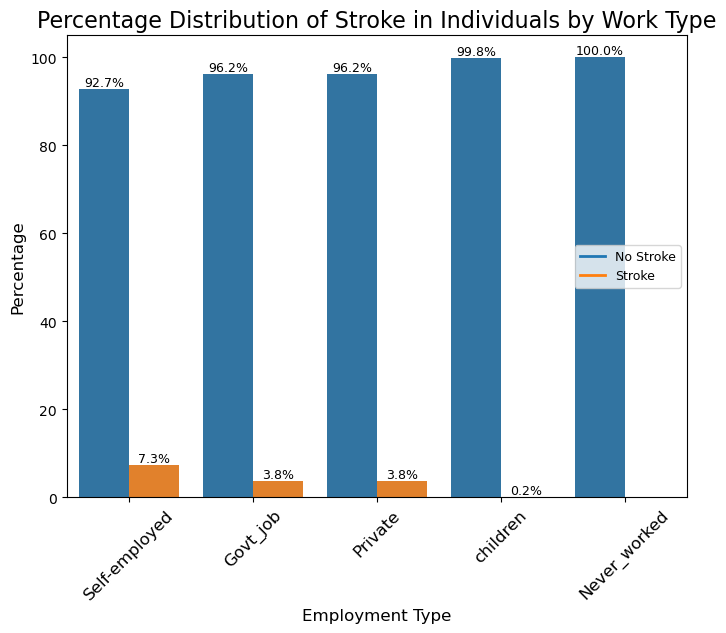

In [43]:
# Calculate the percentage of 'stroke' within each 'work_type' category

percentage_data = (stroke_data.groupby(['work_type', 'stroke']).size() /
                   stroke_data.groupby('work_type')['stroke'].count()) * 100

# Reset the index to make 'work_type' a column

percentage_data = percentage_data.reset_index(name='Percentage')

# Calculate the maximum percentage of stroke for each category

max_percentage_data = percentage_data.groupby('work_type')['Percentage'].max().reset_index()
desc_percent = max_percentage_data.sort_values(by='Percentage', ascending=True)['work_type']

# Create a percentage stacked bar chart with sorted categories

plt.figure(figsize = (8, 6))
ax = sns.barplot(data = percentage_data, x = 'work_type', y = 'Percentage', hue = 'stroke', order = desc_percent)
plt.title('Percentage Distribution of Stroke in Individuals by Work Type', fontsize = 16)
plt.xlabel('Employment Type', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks(rotation = 45, fontsize = 12)

# Add percentage labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height), ha = 'center', va = 'bottom', fontsize = 9)

# Customize the legend labels and set manual colors

labels = ['No Stroke', 'Stroke']
legend_handles = [plt.Line2D([0], [0], color = sns.color_palette()[i], lw = 2) for i in range(2)]
ax.legend(legend_handles, labels, fontsize = 9, loc = 'right')

plt.savefig('Percentage Distribution of Stroke in Individuals by Employment Type.jpg')
plt.show()

# Self-employed have nearly 2x the amount (7.3%) of ppl who have suffered a stroke than other employed individuals

## <u> Exploratory Data Analysis (EDA) Insight </u>

### When exploring work type, self-employed individuals (7.3%) had nearly double the risk of stroke than the rest of the population.

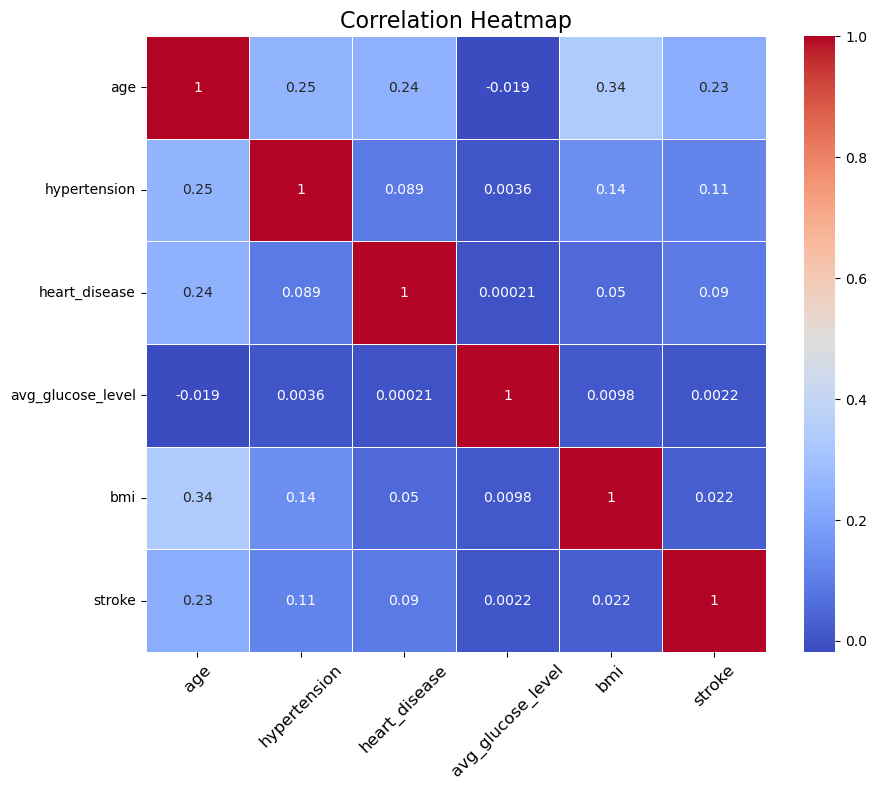

In [44]:
# Correlation matrix of the numeric variables performed
# Variable of interest stroke and age have the highest correlation = .23
# Hypertension (.11) and heart_disease (.09) have small correlations to stroke

corr_matrix = stroke_data.corr(numeric_only = True)

plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap', fontsize = 16)
plt.xticks(rotation = 45, fontsize = 12)
plt.savefig('Correlation Heatmap Between Numeric Variables and Stroke.jpg')
plt.show()

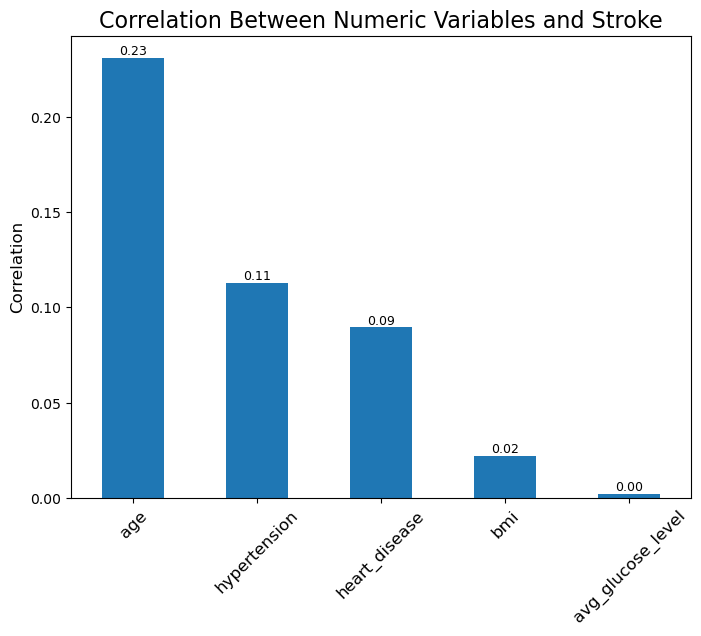

In [45]:
plt.figure(figsize = (8, 6))
correlation_series = stroke_data.corr(numeric_only=True)['stroke'].sort_values(ascending = False)[1:]
ax = correlation_series.plot(kind ='bar')
plt.title('Correlation Between Numeric Variables and Stroke', fontsize = 16)
plt.ylabel('Correlation', fontsize = 12)
plt.xticks(rotation = 45, fontsize = 12)

# Add labels to each bar

for i, v in enumerate(correlation_series):
    ax.text(i, v, f'{v:.2f}', ha = 'center', va = 'bottom', fontsize = 9)

plt.savefig('Correlation Between Numeric Variables and Stroke.jpg')
plt.show()


## <u> Exploratory Data Analysis (EDA) Insights </u>

### Age also had a small positive correlation (.23) with stroke rate. Hypertension (.11) and heart disease (.09) also had small positive correlations with our variable of interest.

### These correlations could be meaningful, given the complexity and multi-factorial nature of health-related outcomes.

# **Binary Logistic Regression - Stroke Prediction**

In [46]:
# Split dataset into features and target variable
# Convert categorical variables into numerical 'dummies' via pandas

variables = ['age', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
             'Residence_type', 'avg_glucose_level', 'bmi', 'age_category', 'bmi_category', 'glucose_category', 'smoking_status']

x = stroke_data[variables]

y = stroke_data['stroke']

x = pd.get_dummies(data = x, columns = ['gender', 'ever_married', 'work_type', 
                                        'Residence_type', 'smoking_status', 'age_category', 'glucose_category', 
                                        'bmi_category'] , drop_first = True)

In [47]:
# Split x and y into training and testing sets
# The train_test_split function from scikit-learn (sklearn) is used to split the data into training and testing sets
# This is to evaluate the model's performance on unseen data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 16)

# test_size parameter determines the proportion of the dataset that will be allocated to the test set
# 25% of the data will be used for testing, leaving 75% for training

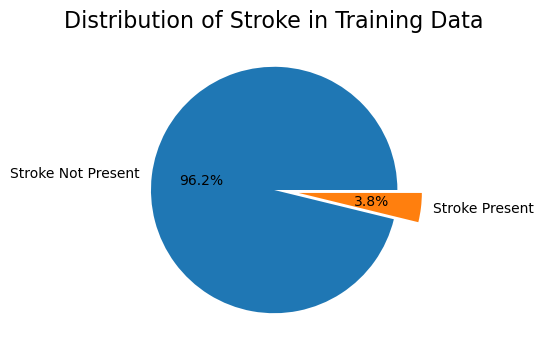

In [48]:
# Check the y_train data to ensure representation of the target variable 'stroke' in the testing set

stroke_training_data = y_train.value_counts(1)

plt.figure(figsize = (6, 4))
plt.pie(stroke_training_data, explode = (0, 0.2), labels = ['Stroke Not Present', 'Stroke Present'], autopct = '%1.1f%%', textprops = {'fontsize': 10})
plt.title('Distribution of Stroke in Training Data', fontsize = 16)
plt.savefig('Distribution of Stroke in Training Data.jpg')
plt.show()

# Identical stroke rate to larger dataset

In [49]:
# Import the class

from sklearn.linear_model import LogisticRegression

# Instantiate the model

logreg = LogisticRegression(random_state = 16, max_iter = 1000)

# Fit the model with data

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

In [50]:
accuracy_score = round(logreg.score(x_test, y_test), 3)
print("\033[1mAccuracy Score =", accuracy_score, "\033[0m")

# Accuracy score of .96
# Classification model performs well in proportion of correctly predicted outcomes to total number of examples in the dataset

Accuracy Score = 0.962 


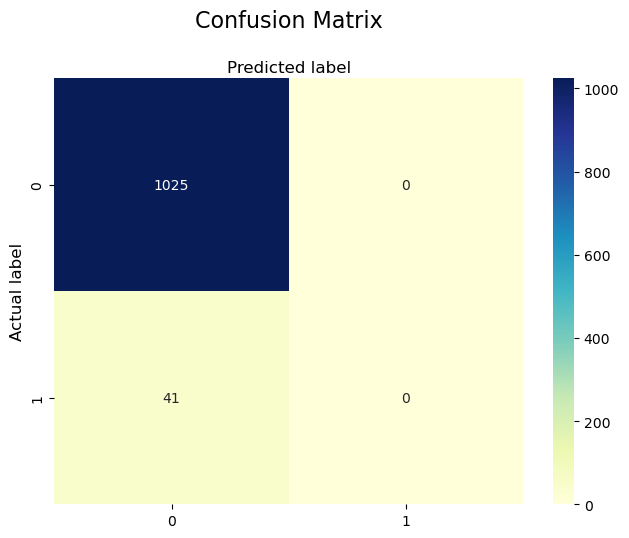

In [51]:
# Import the metrics class

from sklearn import metrics

cnf_matrix_1 = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_1), annot = True, cmap = "YlGnBu" ,fmt = 'g')
plt.tight_layout()
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', y = 1.1, fontsize = 16)
plt.ylabel('Actual label', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 12)
plt.savefig('Confusion Matrix.jpg')
plt.show()

## <u> Binary Logistic Regression Initial Insights </u>

- ### Model is effective at identifying true positives (1025) but has a high number of false negatives (41)
- ### No true negatives (0) and false positives (0) means model isn't distinguishing the negative class
- ### Class imbalance and under-representation of the minority class 'stroke' needs to be addressed
- ### Use SMOTE (Synthetic Minority Oversampling Technique) generate synthetic data for the 'stroke' class

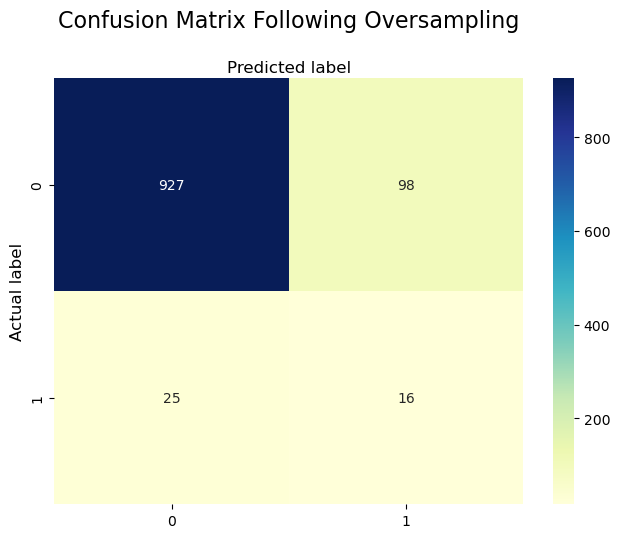

In [52]:
# Model is effective at identifying true positives (1025) but has a high number of false negatives (41)
# No true negatives (0) and false positives (0) means model isn't distinguishing the negative class
# Class imbalance and under-representation of the minority class 'stroke' needs to be addressed
# Use SMOTE (Synthetic Minority Oversampling Technique) generate synthetic data for the 'stroke' class

from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class 'stroke'

smote = SMOTE(sampling_strategy = 'auto', random_state = 16)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Instantiate the model

logreg = LogisticRegression(random_state = 16, max_iter = 1000)

# Fit the model with resampled data

logreg.fit(x_train_resampled, y_train_resampled)

y_pred = logreg.predict(x_test)

cnf_matrix_2 = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_2), annot = True, cmap = "YlGnBu" ,fmt = 'g')
plt.tight_layout()
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix Following Oversampling', y = 1.1, fontsize = 16)
plt.ylabel('Actual label', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 12)
plt.savefig('Confusion Matrix Following Oversampling.jpg')
plt.show()

In [53]:
from sklearn.metrics import classification_report

target_names = ['did not have stroke', 'had stroke']
report = classification_report(y_test, y_pred, target_names=target_names)

formatted_report = report.replace('precision', '\033[1mPrecision\033[0m').replace('recall', '\033[1mRecall\033[0m').replace('f1-score', '\033[1mF1-Score\033[0m')

formatted_report = formatted_report.replace('support', '\033[1mSupport\033[0m')

print(formatted_report)

                     Precision    Recall  F1-Score   Support

did not have stroke       0.97      0.90      0.94      1025
         had stroke       0.14      0.39      0.21        41

           accuracy                           0.88      1066
          macro avg       0.56      0.65      0.57      1066
       weighted avg       0.94      0.88      0.91      1066



## <u> Binary Logistic Regression Insight </u>


### Based on the high precision (.97) and recall (.90), the model shows promising performance for identifying individuals who did not have a stroke

### Needs significant improvement in correctly identifying stroke cases -  only 14% of the predicted positive cases were actually positive and 39% of the actual positive cases were correctly identified

### Model misses a significant portion of actual positive cases



### Although we were able to acheive a good accuracy score (.96), the values contained in the 'stroke' column of this dataset (dependent variable of interest) yielded class imbalance.

### This was despite attempts to oversample the minority class using SMOTE and after binning the continuous variables age, average glucose level, and BMI into categories.

In [54]:
# Precision - how many of the predicted positive cases were actually positive [TP / (TP + FP)]
# 97% of the predicted negative cases were indeed negative
# 14% of the predicted positive cases were actually positive
# This suggests a high number of false positives for this class (98)

# Recall - how many of actual positive cases were correctly predicted as positive [TP / (TP + FN)]
# 90% of the actual negative cases were correctly identified as negative
# 39% of the actual positive cases were correctly identified
# Model misses a significant portion of actual positive cases

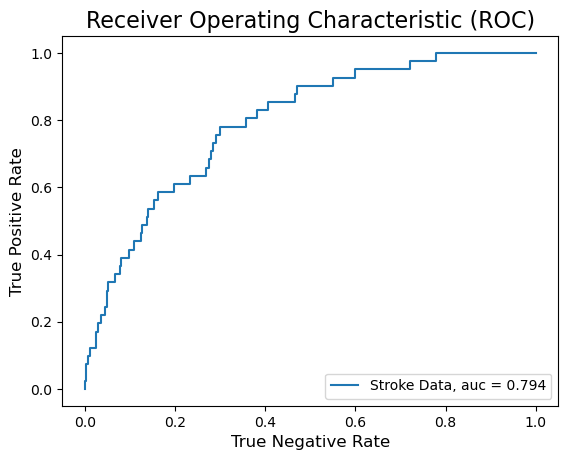

In [55]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label = "Stroke Data, auc = "+str(round(auc, 3)))
plt.title('Receiver Operating Characteristic (ROC)', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.xlabel('True Negative Rate', fontsize = 12)
plt.savefig('Receiver Operating Characteristic (ROC).jpg')
plt.legend(loc = 4)
plt.show()

# Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate
# Shows the tradeoff between sensitivity and specificity
# AUC score for this model is 0.794
# AUC score of 1 represents a perfect classifier and 0.5 represents a poor classifier

## <u> Receiver Operating Characteristic (ROC) Curve Insight </u>

### Area Under the Curve (AUC) score for this model is 0.794 - indicating a relatively good classifier. However, it remains deficient in identifying the variable of interest.

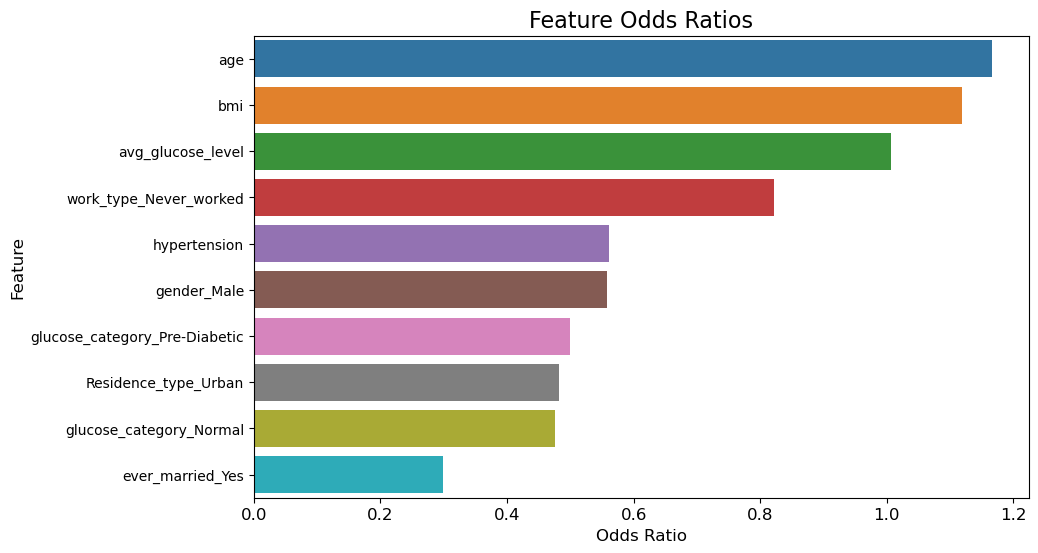

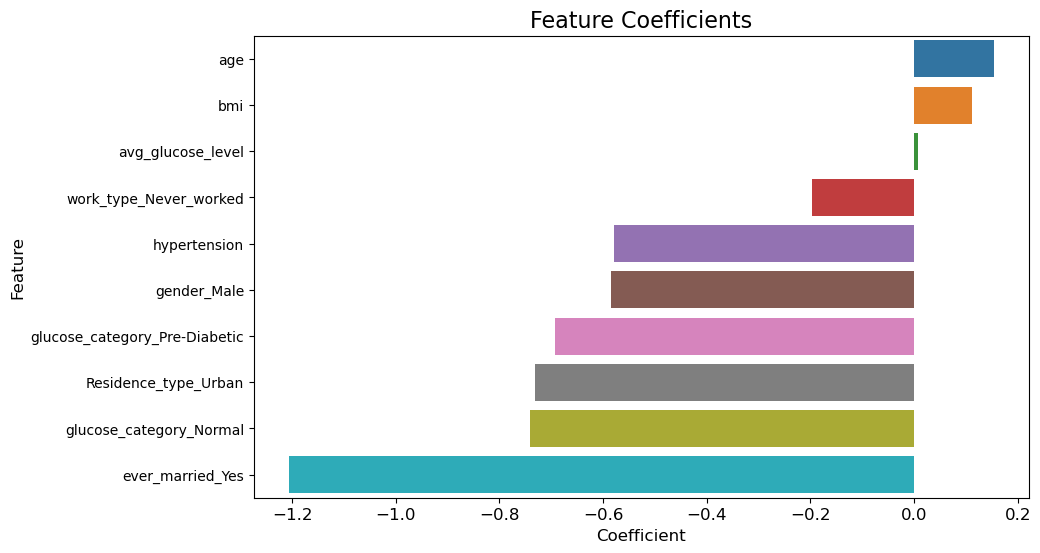

In [56]:
# Extract features and odds ratios to analyze relationship b/w features and target variable
# Import RFE (Recursive Feature Elimination) to perform feature selection

from sklearn.feature_selection import RFE

# Extract the feature coefficients (weights)

coefficients = logreg.coef_[0]

# Odds ratio is calculated by exponentiating each coefficient
# Transforms the coefficients into odds ratios
# Provides insights into the impact of each feature on the odds of the positive class
# Features with higher odds ratios have a stronger association with the positive class

odds_ratios = np.exp(coefficients)  

# Create a DataFrame to display feature names, coefficients, and odds ratios

feature_names = x_train.columns

stroke_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients, 'Odds Ratio': odds_ratios})

# Sort by 'Odds Ratio' in descending order to show the features with the most influence at the top

stroke_odds_ratio = stroke_coefficients.sort_values(by = 'Odds Ratio', ascending = False).head(10)

plt.figure(figsize = (10, 6))
sns.barplot(data = stroke_odds_ratio, x = 'Odds Ratio', y = 'Feature')
plt.title('Feature Odds Ratios', fontsize = 16)
plt.xlabel('Odds Ratio', fontsize = 12)
plt.ylabel('Feature', fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()

# Age (1.16), bmi (1.13), and avg_glucose_level (.007) are the only OR > 1
# Meaning that for each one-year increase in age, stroke odds increase by a factor of approximately 1.16
# Meaning that for each one-year increase in bmi, stroke odds increase by a factor of approximately 1.13

stroke_coefficients_plot = stroke_coefficients.sort_values(by = 'Coefficient', ascending = False).head(10)

plt.figure(figsize = (10, 6))
sns.barplot(data = stroke_coefficients_plot, x = 'Coefficient', y = 'Feature')
plt.title('Feature Coefficients', fontsize = 16)
plt.xlabel('Coefficient', fontsize = 12)
plt.ylabel('Feature', fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()

# Age (.15) and bmi (.12) have the highest coefficients

# Multicollinearity (correlation between predictor variables) can make it challenging to interpret the effect of a single variable in isolation

## <u> Feature Coefficients and Odds Ratios (OR) Insights </u> 

### Age (.15) and BMI (.12) have the highest coefficients indicating that an increase in age or BMI is associated with an increased likelihood of having a stroke.

### Age (1.16) and BMI (1.13) have odd ratios greater than one, indicating they are associated with increased odds of having a stroke.

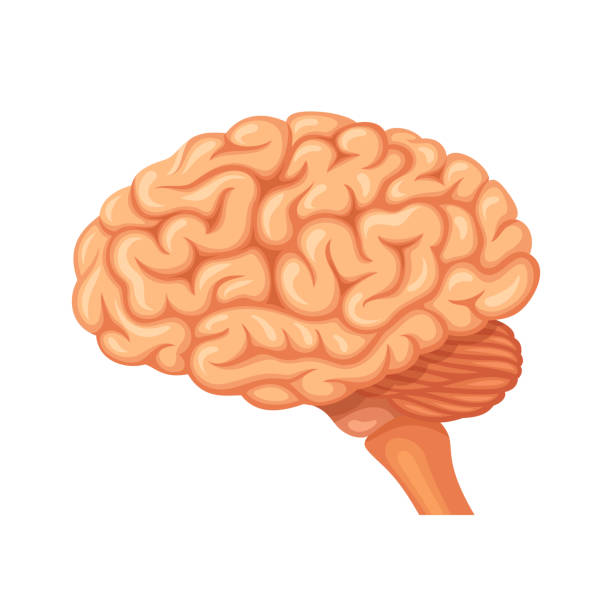

## <u> Final Conclusions </u>

- ### Despite attempts at oversampling as well as grouping our continuous variables, the binary logistic regression model did not perform well in identifying positive stroke cases
- ### While this health dataset presented a binary classification problem, the insights gathered from this particular data analysis focused primarily on Exploratory Data Analysis (EDA)
- ### The following should be areas of focus for both resource allocation for treatment and education of at-risk populations by the ISPA with the long term goal of decreasing stroke occurrence rate - 
    - ### Age and BMI have the highest correlations, odds ratios, and coefficients with our dependent variable of interest (presence of stroke)
    
     - ### Those individuals who have heart disease (12.2%) or hypertension (11.3%) demonstrated nearly triple the normal stroke rate (3.8%)

    - ### 11.2% of seniors, 4.3% of diabetics, and 5.8% of overweight individuals had a stroke; indicating possible relationships
    - ### Former (6.7%) and current smokers (3.9%) have higher stroke rates as well; indicating a possible relationship
    
    - ### Self-employed people had nearly double the stroke rate (7.3%)

## <u> Potential Future Improvements to this Data Analysis </u> 

- ### Incorporating more robust machine learning models to generate meaningful results

- ### Larger dataset with additional variables (i.e. stress, alcohol intake, or average amount of hours slept daily) would likely yield additional value

- ### Geographic data may also offer further insights regarding concentration of stroke by location